# 1. Installation

In [ ]:
!pip install -r requirements.txt

# 2. Imports

In [2]:
from mnist_classifier import MnistClassifier
from sklearn.datasets import fetch_openml
from torchsummary import summary
import matplotlib.pyplot as plt
import numpy as np
import random

# 3. Load MNIST

In [8]:
mnist = fetch_openml('mnist_784', version=1, as_frame=False) # fetch mnist dataset from sklearn.datasets
X, y = mnist.data, mnist.target.astype(np.uint8)

# 4. Preprocessing

In [9]:
X = X.reshape(-1, 28, 28)  # Required for CNN
X_train, X_test = X[:60000] / 255.0, X[60000:] / 255.0
y_train, y_test = y[:60000], y[60000:]

# 5. Example Usage

In [6]:
def train_and_evaluate(algorithm):
    clf = MnistClassifier(algorithm=algorithm)
    clf.train(X_train, y_train)
    preds = clf.predict(X_test[:100])  # First 100 samples
    accuracy = (preds == y_test[:100]).mean()
    print(f"{algorithm.upper()} Accuracy: {accuracy:.2%}")

train_and_evaluate('rf')
train_and_evaluate('nn')
train_and_evaluate('cnn')

RF Accuracy: 100.00%
NN Accuracy: 99.00%
CNN Accuracy: 99.00%


# 6. Visualization

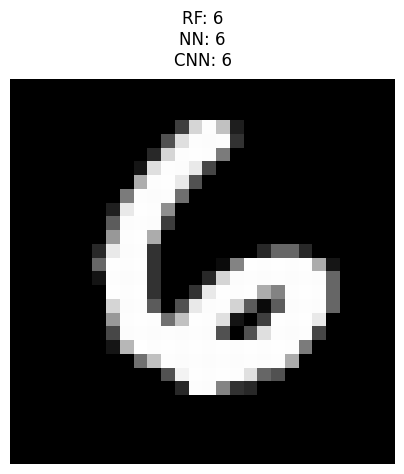

In [ ]:
# Let's plot an example of image and our model's predictions

def visualize_prediction(algorithms):
    idx = random.randint(0, len(X_test) - 1)
    image = X_test[idx].reshape(28, 28)

    plt.figure(figsize=(5, 5))
    plt.imshow(image, cmap='gray')
    plt.axis('off')

    predictions = []
    for algo in algorithms:
        clf = MnistClassifier(algorithm=algo)
        clf.train(X_train, y_train)
        pred = clf.predict(X_test[idx:idx+1])[0]
        predictions.append(f"{algo.upper()}: {pred}")

    plt.title("\n".join(predictions), fontsize=12, pad=10)
    plt.show()

visualize_prediction(['rf', 'nn', 'cnn'])

# 7. Edge Cases

In [9]:
# - Invalid algorithm name
try:
    clf = MnistClassifier(algorithm='invalid')
except ValueError as e:
    print(f"Error: {e}")

# - Incorrect input shape
try:
    clf = MnistClassifier(algorithm='cnn')
    clf.predict(X_test[0].flatten())  # Should be 28x28
except Exception as e:
    print(f"Shape Error: {e}")

Error: Invalid algorithm. Choose 'rf', 'nn' or 'cnn'.
Shape Error: Expected 3D (unbatched) or 4D (batched) input to conv2d, but got input of size: [784, 1]
